In [1]:
# DAL Library
# version 0.1.0

source("load_harbinger.R")

#loading Harbinger
load_harbinger() # see ../load_harbinger.R 

Loading required package: harbinger

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Warning message:
“replacing previous import ‘ggplot2::margin’ by ‘randomForest::margin’ when loading ‘harbinger’”

Attaching package: ‘harbinger’


The following object is masked from ‘package:stats’:

    optimize


The following object is masked from ‘package:utils’:

    head


The following object is masked from ‘package:base’:

    transform




In [2]:
#loading the example database
data(har_examples)

In [3]:
#Using the time series 1 
dataset <- har_examples[[5]]
head(dataset)

,serie,event
,<dbl>,<lgl>
1,0.00,FALSE
2,0.25,FALSE
3,0.50,FALSE
4,0.75,FALSE
5,1.00,FALSE
6,1.25,FALSE


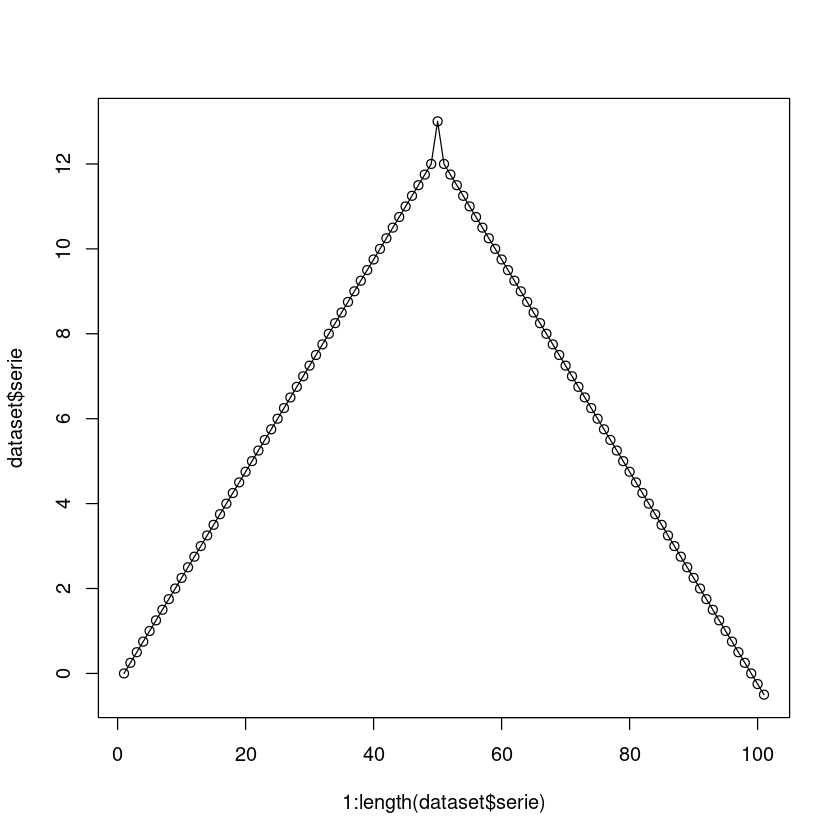

In [4]:
#ploting serie #1

plot(x = 1:length(dataset$serie), y = dataset$serie)
lines(x = 1:length(dataset$serie), y = dataset$serie)

In [5]:
# establishing change finder arima method 
  model <- change_finder_arima()

In [6]:
# fitting the model
  model <- fit(model, dataset$serie)

In [7]:
# making detections using fbiad
  detection <- detect(model, dataset$serie)

In [8]:
# filtering detected events
  print(detection |> dplyr::filter(event==TRUE))

  idx event         type
1  50  TRUE change_point


In [9]:
# evaluating the detections
  evaluation <- evaluate(model, detection$event, dataset$event)
  print(evaluation$confMatrix)

          event      
detection TRUE  FALSE
TRUE      1     0    
FALSE     0     100  


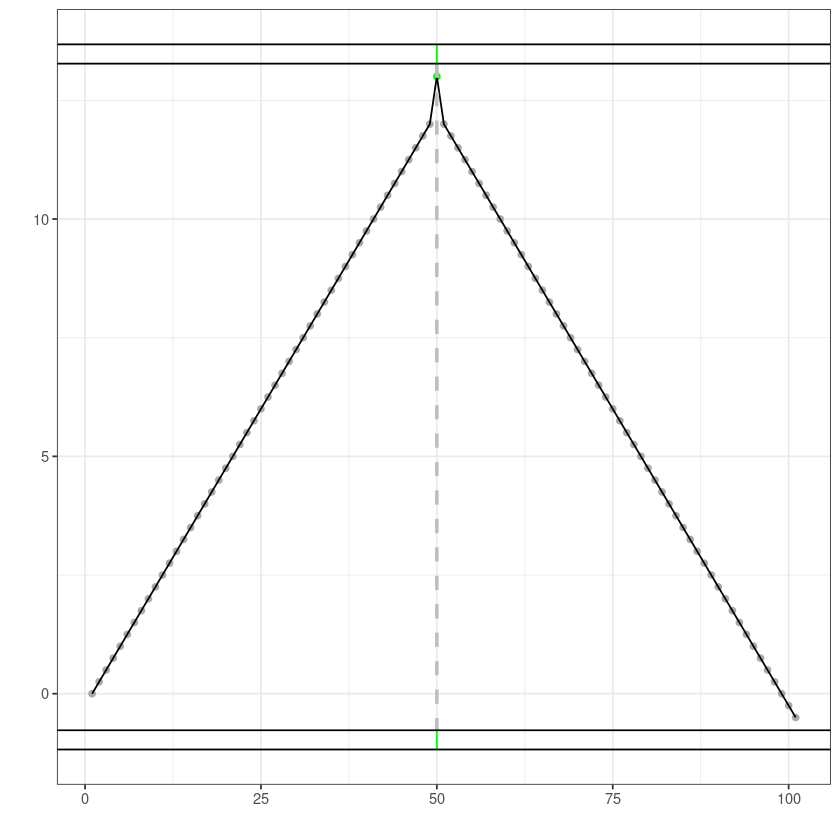

In [10]:
# ploting the results
  grf <- plot.harbinger(model, dataset$serie, detection, dataset$event)
  plot(grf)